In [55]:
import pandas as pd
import numpy as np
import ipaddress
import os

In [56]:
def create_list(path):
    data = pd.read_csv(path)
    prefixes = data['prefixes'].unique()
    output = []
    for prefix in prefixes:
        temp = prefix.replace("'",'"')
        parsed_pfx = json.loads(temp)
        output.append(parsed_pfx['ipv4'][0])
    
    return output

In [57]:
#Helpers
#This function makes a dictionary out of the keys
def make_dict(keys):
    output = {}
    for key in keys:
        output[key] = {'total_routes':0,'completed_routes':0}
    return output
#This function will iteratively go over the routes and check how many succeed and how   
def analyze_routes(root_dir,prefix_list):
    frame = make_dict(prefix_list)
    for entry in os.listdir(root_dir):
        upperPath = os.path.join(root_dir,entry)
        if os.path.isdir(upperPath):
            for mid in os.listdir(upperPath):
                fullPath = os.path.join(upperPath,mid)
                if os.path.isdir(fullPath):
                    data = pd.read_csv(fullPath+'/final_out.csv')
                    destination_ip = data['Destination_IP'][0]
                    if destination_ip in prefix_list:
                        frame[destination_ip]['total_routes'] += data.shape[0]
                        frame[destination_ip]['completed_routes'] += data['possibly_reached?'].value_counts()[True]
    
    output = pd.DataFrame(frame)
    output.to_csv(root_dir+'counts.csv')
                    
                        
                    
                    
                        

In [58]:
romania_ix = ['185.0.0.2', '185.0.0.253', '86.104.125.176','86.104.125.129','86.104.125.69','86.104.125.80','185.1.103.77','185.1.103.97', '185.1.103.94', '185.1.103.95','185.1.179.3','185.1.150.0']
turkey_ix = ['185.1.48.28','185.1.48.22','185.1.48.37']
slovakia_ix = ['194.30.187.168', '194.30.187.211','194.30.187.171','194.30.187.12','194.30.187.221','185.1.234.15','185.1.234.10','192.108.148.30', '192.108.148.31','192.108.148.168', '192.108.148.170', '192.108.148.171','192.108.148.215', '192.108.148.216']

In [60]:
analyze_routes('/Users/nishantacharya/Desktop/bdrmapit_updated/traceroutes/T/Turkey/',turkey_ix)
analyze_routes('/Users/nishantacharya/Desktop/bdrmapit_updated/traceroutes/R/Romania/',romania_ix)
analyze_routes('/Users/nishantacharya/Desktop/bdrmapit_updated/traceroutes/S/Slovakia/',slovakia_ix)

In [69]:
romania_ixps = {"DSIX":[74,28],"InterLAN-IX":[296,118],"RoNIX":[296,142],"ROPNIX":[74,27],"InternetExchange-SRL/(ROIX)/":[74,39]}
slovakia_ixps = {"NIX":[220,190],"PoIX":[88,47],"SIX":[308,280]}
turkey_ixps = {"DE-CIX Istanbul":[143,129]}#Not a good representation

In [70]:
romania_avgs = [67.83,29.5]
turkey_avgs = [47.67,43]
slovakia_avgs = [44,36.928]

In [106]:
romania_graph = {"ixps":['DSIX','InterLAN-IX','ROPNIX','ROIX'],"total":[74,296,74,74],"completed":[28,118,27,39]}
slovakia_graph = {"ixps":['NIX','PoIX','SIX'],"total":[220,88,308],"completed":[190,47,280]}
turkey_graph = {"ixps":["DE-CIX Istanbul"],"total":[143],"completed":[129]}

In [125]:
import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
def addlabels2(x,y,name):
    for i in range(len(x)):
        if name != "Turkey":
            plt.text(i+0.35, y[i], y[i], ha = 'center')
        else:
            plt.text(i+0.2, y[i], y[i], ha = 'center')
            

def create_graph(data,title):
    # Extract data lists from the dictionary
    categories = data["ixps"]
    values1 = data["total"]
    values2 = data["completed"]

    # Create a bar width
    bar_width = 0.35

    # Define positions for each bar group on the x-axis
    index = range(len(categories))

    # Create subplots and adjust spacing
    fig, ax = plt.subplots()
    plt.subplots_adjust(bottom=0.3)  # Adjust space for labels

    # Plot bars for Values1 with blue color and label
    plt.bar(index, values1, bar_width, label="Total Routes", color='pink')
    addlabels(index,values1)
    

    # Shift positions for Values2 bars to avoid overlap
    shifted_index = [i + bar_width for i in index]

    # Plot bars for Values2 with green color and label
    plt.bar(shifted_index, values2, bar_width, label="Completed Routes", color='teal')
    addlabels2(shifted_index,values2,title)

    # Set labels and title
    plt.xlabel("IXPs")
    plt.ylabel("Routes")
    plt.title(title+"'s"+" Route Analysis per IXP")

    # Set x-axis positions with category labels
    plt.xticks([i + bar_width/2 for i in index], categories)

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

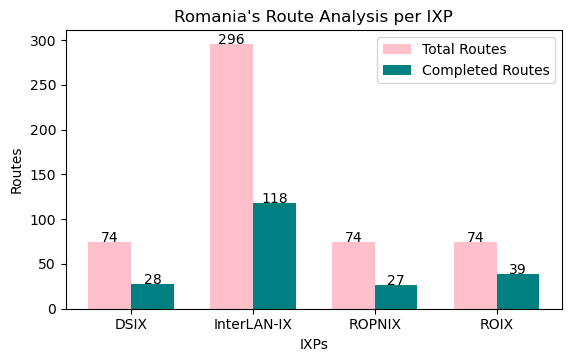

In [126]:
create_graph(romania_graph,"Romania")

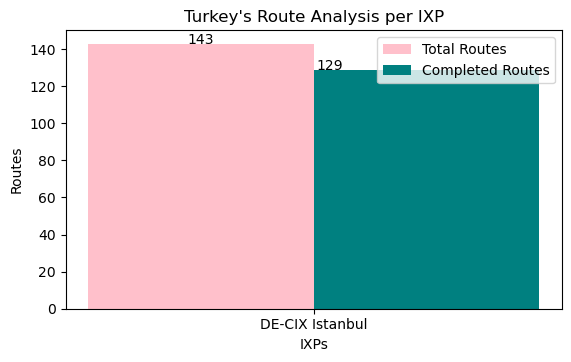

In [127]:
create_graph(turkey_graph,"Turkey")

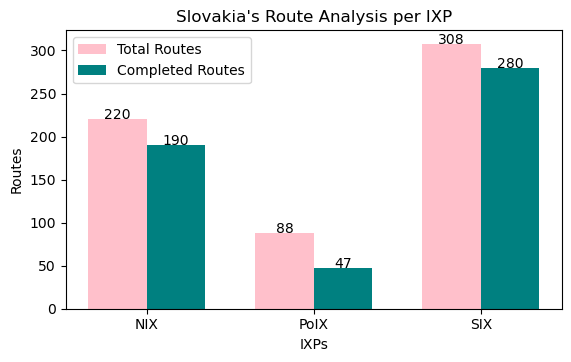

In [128]:
create_graph(slovakia_graph,"Slovakia")

In [238]:
#metric
def calculate_metric(completed_routes,total_routes,total_IPs,IXP_IPs):
    return 50*(completed_routes/total_routes)+50*(IXP_IPs/total_IPs)

def calculate_percentage_served(total_IPs,IXP_IPs):
    return IXP_IPs/total_IPs

In [239]:
romania_graph = {"ixps":['DSIX','InterLAN-IX','ROPNIX','ROIX'],"total":[74,296,74,74],"completed":[28,118,27,39]}
slovakia_graph = {"ixps":['NIX','PoIX','SIX'],"total":[220,88,308],"completed":[190,47,280]}
turkey_graph = {"ixps":["DE-CIX Istanbul"],"total":[143],"completed":[129]}

In [240]:
DSIX = calculate_metric(28,74,7703296,3072)
InterLAN = calculate_metric(118,296,7703296,2896128)
ROPNIX = calculate_metric(27,74,7703296,256)
ROIX = calculate_metric(39,74,7703296,9728)
NIX = calculate_metric(190,220,2194944,270080)
PoIX = calculate_metric(47,88,2194944,8704)
SIX = calculate_metric(280,308,2194944,728576)
CIX = calculate_metric(129,143,16296448,3648000)

In [241]:
ranks = [DSIX,InterLAN,ROPNIX,ROIX,NIX,PoIX,SIX,CIX]
names = ['DSIX','InterLAN-IX','ROPNIX','ROIX','NIX','PoIX','SIX','DE-CIX Istanbul']
Table = {'IXP_Names':names,'Metric_Values':ranks}
results = pd.DataFrame(Table)
ranked = results.sort_values('Metric_Values',ascending = False)
print(ranked.to_string(index=False))

      IXP_Names  Metric_Values
            SIX      62.051233
DE-CIX Istanbul      56.297518
            NIX      49.334139
    InterLAN-IX      38.730412
           PoIX      26.902819
           ROIX      26.414493
           DSIX      18.938858
         ROPNIX      18.244905


In [242]:
ranks

[18.93885843571796,
 38.730411894730125,
 18.24490486964316,
 26.414493154548317,
 49.334139152193735,
 26.902819305723433,
 62.05123311491401,
 56.29751818447662]

In [243]:
#Checking the number of IPs that the state ASes affect
state_ips = pd.read_csv('/Users/nishantacharya/Downloads/state_prefixes.csv')

In [244]:
turkey = state_ips.loc[state_ips['ASN'] == 47524]
bits = 32 - turkey['size']

In [245]:
bits

0      10
1      10
2      10
3       8
4       8
       ..
625     8
626    10
627     8
628     8
629     8
Name: size, Length: 630, dtype: int64

In [246]:
bits = bits.tolist()

In [247]:
ips = []
for num in bits:
    num = 2**num
    ips.append(num)

In [248]:
total_turkey = sum(ips)

In [249]:
#Total turkey over total in IXP
total_turkey/3648000

0.12364912280701755

In [250]:
#Total turkey over full turkey
total_turkey/16296448

0.02767916051399667

In [251]:
slovakia = state_ips.loc[state_ips['ASN'] == 15471]
bits = 32 - slovakia['size']
bits = bits.tolist()
ips = []
for num in bits:
    num = 2**num
    ips.append(num)
total_romania = sum(ips)

In [252]:
#Total Romania over total in IXP(InterLan)
total_romania/2896128

0.010607265977194379

In [253]:
#Total Romania over full Romania
total_romania/7703296

0.003987903359808581

In [254]:
DSIX = calculate_percentage_served(7703296,3072)
InterLAN = calculate_percentage_served(7703296,2896128)
ROPNIX = calculate_percentage_served(7703296,256)
ROIX = calculate_percentage_served(7703296,9728)
NIX = calculate_percentage_served(2194944,270080)
PoIX = calculate_percentage_served(2194944,8704)
SIX = calculate_percentage_served(2194944,728576)
CIX = calculate_percentage_served(16296448,3648000)

In [255]:
ranks = [DSIX,InterLAN,ROPNIX,ROIX,NIX,PoIX,SIX,CIX]
names = ['DSIX','InterLAN-IX','ROPNIX','ROIX','NIX','PoIX','SIX','DE-CIX Istanbul']
Table = {'IXP_Names':names,'%_Values':ranks}
results = pd.DataFrame(Table)
ranked = results.sort_values('%_Values',ascending = False)
print(ranked.to_string(index=False))

      IXP_Names  %_Values
    InterLAN-IX  0.375960
            SIX  0.331934
DE-CIX Istanbul  0.223852
            NIX  0.123046
           PoIX  0.003965
           ROIX  0.001263
           DSIX  0.000399
         ROPNIX  0.000033
